In [1]:
## Lecture des données de Kc au pas de temps mensuel
kc.moi <- read.csv('../Data/Tableau_Kc_Ebener1999.csv',header=TRUE)

In [2]:
kc.moi

mois,Prairies,Vigne,Foret.de.conifères,Mais
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.45,0.25,1.00,0.20
2,0.45,0.25,1.00,0.20
3,0.50,0.25,1.02,0.20
4,0.61,0.38,1.05,0.32
5,0.78,0.53,1.07,0.68
6,0.78,0.70,1.10,1.20
7,0.78,0.73,1.10,1.20
8,0.78,0.73,1.10,0.91
9,0.65,0.65,1.06,0.65


In [3]:
## Date pour les valeurs de Kc mensuel
kc.dates <- as.Date(c("2016-1-1",paste("2016",kc.moi$mois,"15",sep="-"),"2016-12-31"))
## Passage au jour julien
kc.doi <- julian(kc.dates,origin = as.Date("2016-01-01"))

In [4]:
## Kc de la culture d'intérêt
kc.prairies <- c(kc.moi$Prairies[1],kc.moi$Prairies,kc.moi$Prairies[12])
kc.vigne <- c(kc.moi$Vigne[1],kc.moi$Vigne,kc.moi$Vigne[12])
kc.conifere <- c(kc.moi$Foret.de.conifères[1],kc.moi$Foret.de.conifères,kc.moi$Foret.de.conifères[12])
kc.mais <- c(kc.moi$Mais[1],kc.moi$Mais,kc.moi$Mais[12])

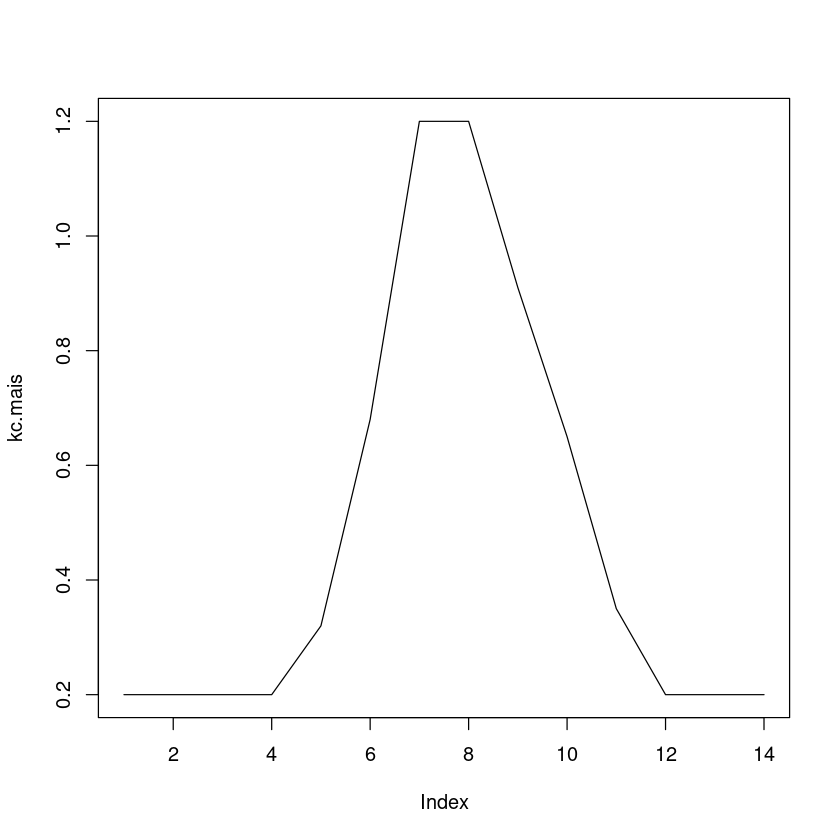

In [6]:
plot(kc.mais, type="l") ## Trace le Kc 

In [7]:
## transforme les dates calendaires en jours juliens ou day of the year pour une année type
mydates <- seq(as.Date("2016/1/1"), as.Date("2016/12/31"), by = "days")
doi <- julian(mydates,origin = as.Date("2016-01-01"))+1

In [10]:
## fonction pour l'interpolation de kc au pas de temps journalier
## selon 3 méthodes : contant, linéaire, spline
kcinterp <- function(kc.doi=kc.doi,kc.os=NULL,doi=doi){
    kc.capprox <- approx(x=kc.doi,y=kc.os,xout=doi,method='constant')$y
    kc.lapprox <- approx(x=kc.doi,y=kc.os,xout=doi,method='linear')$y
    kc.spline <- spline(x=kc.doi,y=kc.os,xout=doi)$y
    return(cbind(doi,kc.capprox,kc.lapprox,kc.spline))
}

## Interpolation de Kc journalière
mykc <- kcinterp(kc.doi=kc.doi,kc.os=kc.mais,doi=doi)
head(mykc)

doi,kc.capprox,kc.lapprox,kc.spline
1,0.2,0.2,0.1999332
2,0.2,0.2,0.1998767
3,0.2,0.2,0.1998305
4,0.2,0.2,0.1997945
5,0.2,0.2,0.1997688
6,0.2,0.2,0.1997534


In [13]:
## création d'un dataframe avec jj et valeur de kc interpolée
Kc <- as.data.frame(mykc)
##remplace les NA
ind <- which(is.na(Kc),arr.ind=TRUE)
for(i in 1:nrow(ind)){Kc[ind[i,1],ind[i,2]] <- Kc[ind[i,1]-1,ind[i,2]]}
colnames(Kc) <- c("doi","kcc","kcl","kcs")
head(Kc)

,doi,kcc,kcl,kcs
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.2,0.2,0.1999332
2,2,0.2,0.2,0.1998767
3,3,0.2,0.2,0.1998305
4,4,0.2,0.2,0.1997945
5,5,0.2,0.2,0.1997688
6,6,0.2,0.2,0.1997534


In [14]:
## sauvegarde du Kc au pas de journalier
## dans le cas présente c'est le Kc du Maïs
save(Kc, file="Kc.RData")

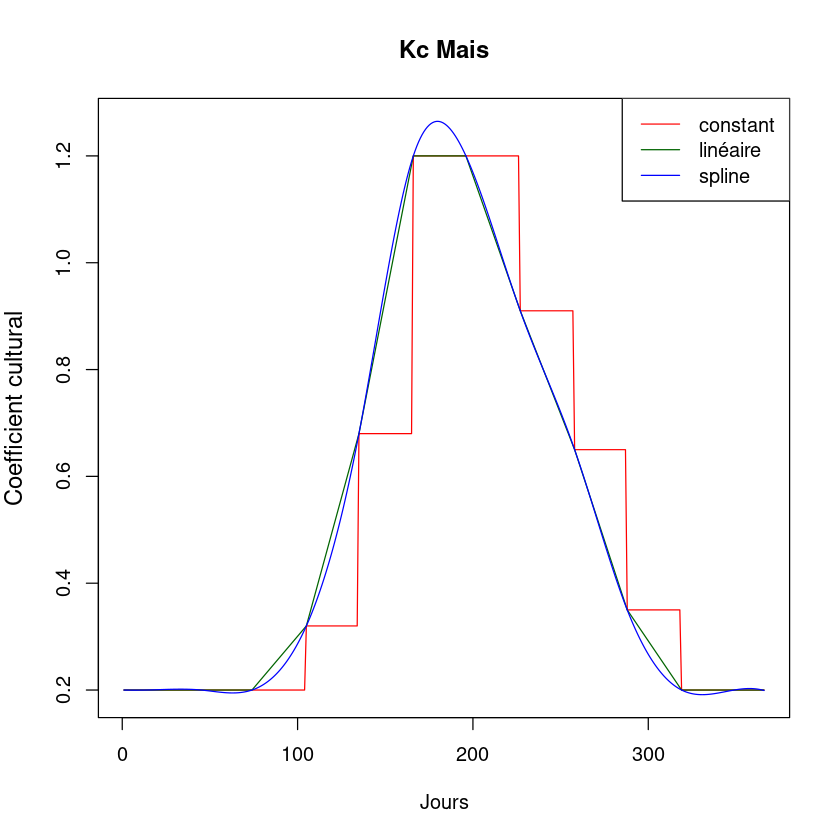

In [17]:
## trace evolution annuelle de Kc
#pdf("figKc.pdf", width = 6, height = 6)
plot(kcc~doi,data=Kc,type="l",col="red", xlab = "Jours", main="Kc Mais",
     ylab=list("Coefficient cultural",cex=1.2), ylim = c(min(Kc$kcs),max(Kc$kcs)))
lines(kcl~doi,data=Kc,type="l",col="darkgreen")
lines(kcs~doi,data=Kc,type="l",col="blue")
legend("topright", c("constant", "linéaire","spline"),col=c("red","darkgreen","blue"),lwd = 1)
#dev.off()